In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [30]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [31]:
class_names = ['male', 'female']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [37]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [38]:
# Building CNN Model
model = keras.Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                input_shape=(50, 50,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [39]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [40]:
# Train model
train_images = train_images.reshape(-1, 50, 50, 1)
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
152/152 [==============================] - 12s 74ms/step - loss: 0.5619 - accuracy: 0.6995
Epoch 2/10
152/152 [==============================] - 13s 84ms/step - loss: 0.4188 - accuracy: 0.8160
Epoch 3/10
152/152 [==============================] - 12s 76ms/step - loss: 0.3634 - accuracy: 0.8392
Epoch 4/10
152/152 [==============================] - 11s 73ms/step - loss: 0.3201 - accuracy: 0.8619
Epoch 5/10
152/152 [==============================] - 11s 74ms/step - loss: 0.3016 - accuracy: 0.8741
Epoch 6/10
152/152 [==============================] - 12s 77ms/step - loss: 0.2795 - accuracy: 0.8786
Epoch 7/10
152/152 [==============================] - 11s 74ms/step - loss: 0.2573 - accuracy: 0.8910
Epoch 8/10
152/152 [==============================] - 12s 76ms/step - loss: 0.2301 - accuracy: 0.9002
Epoch 9/10
152/152 [==============================] - 12s 76ms/step - loss: 0.2155 - accuracy: 0.9068
Epoch 10/10
152/152 [==============================] - 11s 75ms/step - loss: 0.186

In [42]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

51/51 [==============================] - 1s 21ms/step - loss: 0.3552 - accuracy: 0.8585
Test accuracy: 0.8584672212600708


In [43]:
predictions = model.predict(test_images) #test_images
predictions

In [46]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    if i[0]> i[1]:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)
print(y_predicted)

[1 1 0 ... 0 1 1]


BACC = 85.83373148590539


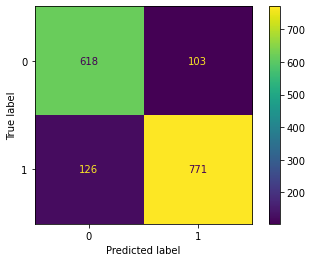

In [48]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

TypeError: list indices must be integers or slices, not numpy.float64

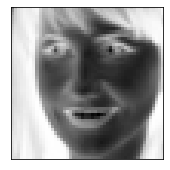

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()
